<a href="https://colab.research.google.com/github/NadiaDrir/Hello/blob/main/Unsupervised%20leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")
data=data.drop("CUST_ID", axis=1)
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
data["MINIMUM_PAYMENTS"].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data["CREDIT_LIMIT"].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
#standarisation normalisation  
from sklearn.preprocessing import StandardScaler,normalize
from scipy.stats import zscore
data_scaled=data.apply(zscore)
data_scaled=normalize(data_scaled)
data=pd.DataFrame(data_scaled,columns=data.columns)

In [21]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)
data['Agglo_clusters_labels']=clust_labels
agglomerative=pd.DataFrame(clust_labels)
data['Agglo_clusters_labels'].value_counts()

0    4811
1    2397
2     873
3     869
Name: Agglo_clusters_labels, dtype: int64

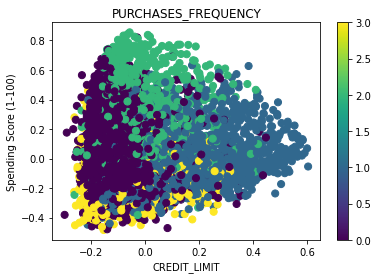

In [25]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ["BALANCE"] , c=agglomerative[0], s=50)
ax.set_title("PURCHASES_FREQUENCY")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

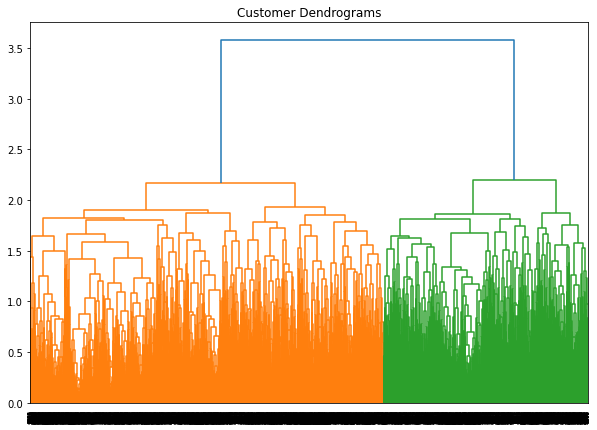

In [10]:
import matplotlib.pyplot as plt
import scipy .cluster .hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [27]:
from sklearn.cluster import KMeans #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
labels
data['K_clusters_labels']=labels
data['K_clusters_labels'].value_counts()

1    4746
2    3335
0     869
Name: K_clusters_labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


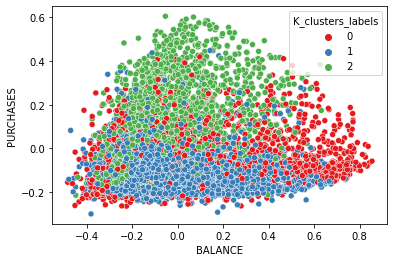

In [24]:
import seaborn as sns 
sns.set_palette("Set2")
sns.scatterplot(data['BALANCE'],data['PURCHASES'],hue=data["K_clusters_labels"],palette='Set1')

In [28]:
sse=[]
K=range(1,15)
for i in K:
     Km=KMeans(n_clusters=i)
     Km=Km.fit(data)
     sse.append(Km.inertia_)

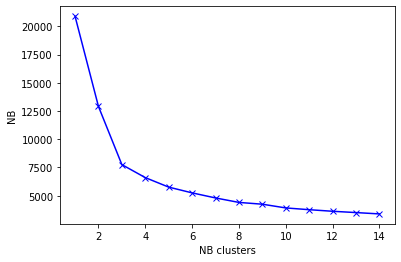

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(K,sse,'bx-')
plt.xlabel('NB clusters')
plt.ylabel('NB squares')
plt.ylabel('NB')
plt.show()